In [62]:
import geopandas as gpd
import pandas as pd
gdf_inscriptions = pd.read_csv("gdf_inscriptions_chypre.csv")

In [63]:
gdf_inscriptions.columns

Index(['Inscription #', 'Type', 'Place', 'Date', 'Nature', 'Material',
       'Place_Region', 'Place_precision', 'Site', 'Precision_Date',
       'Date_Precision_2', 'id_pleiades', 'trismegistos_id', 'coordinates',
       'latitude', 'longitude', 'geometry', 'popup_text', 'Settlement_ID',
       'Settlement_name'],
      dtype='object')

In [64]:
print(gdf_inscriptions['Type'].value_counts().head(20))

Type
GA                               4735
CM                               3154
CS                               1317
CM?                               383
CS & GA                           166
GA & RA                            77
CM ?                               59
CM                                 22
CS & Ph                            19
EC?                                19
CS?                                 8
EC                                  8
EC & GA                             8
GA & Ph                             5
EC? CS?                             5
CM? Straw marks?                    5
EC? & GA                            4
CS                                  4
GA\r                                4
GA & RA?\r(separate\rinscr.?)       3
Name: count, dtype: int64


In [65]:
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('CM?', 'CM')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('CM ?', 'CM')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('CM? Straw marks?', 'CM')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('CM ', 'CM')


In [66]:
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('CS?', 'CS')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('CS ', 'CS')

In [67]:
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace(' GA', 'GA')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('GA ', 'GA')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('GA\r', 'GA')
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('GA?', 'GA')


In [68]:
gdf_inscriptions['Type'] = gdf_inscriptions['Type'].replace('EC?', 'EC')

In [69]:
print(gdf_inscriptions['Type'].value_counts().head(20))

Type
GA                               4743
CM                               3623
CS                               1329
CS & GA                           166
GA & RA                            77
EC                                 27
CS & Ph                            19
EC & GA                             8
GA & Ph                             5
EC? CS?                             5
EC? & GA                            4
GA & RA?\r(separate\rinscr.?)       3
GA \rCS\rPh                         2
CS? CM?                             2
GA & ??                             1
CS & Eg                             1
CS? Carian?                         1
Name: count, dtype: int64


In [70]:
import matplotlib.pyplot as plt
!pip install contextily
import contextily as cx #pour fond de carte

In [71]:
gdf_inscriptions['geometry'] = gpd.points_from_xy(gdf_inscriptions['longitude'], gdf_inscriptions['latitude'])
gdf_inscriptions = gpd.GeoDataFrame(gdf_inscriptions, geometry='geometry', crs='EPSG:4326')


) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
) missing from font(s) DejaVu Sans.
  draw()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


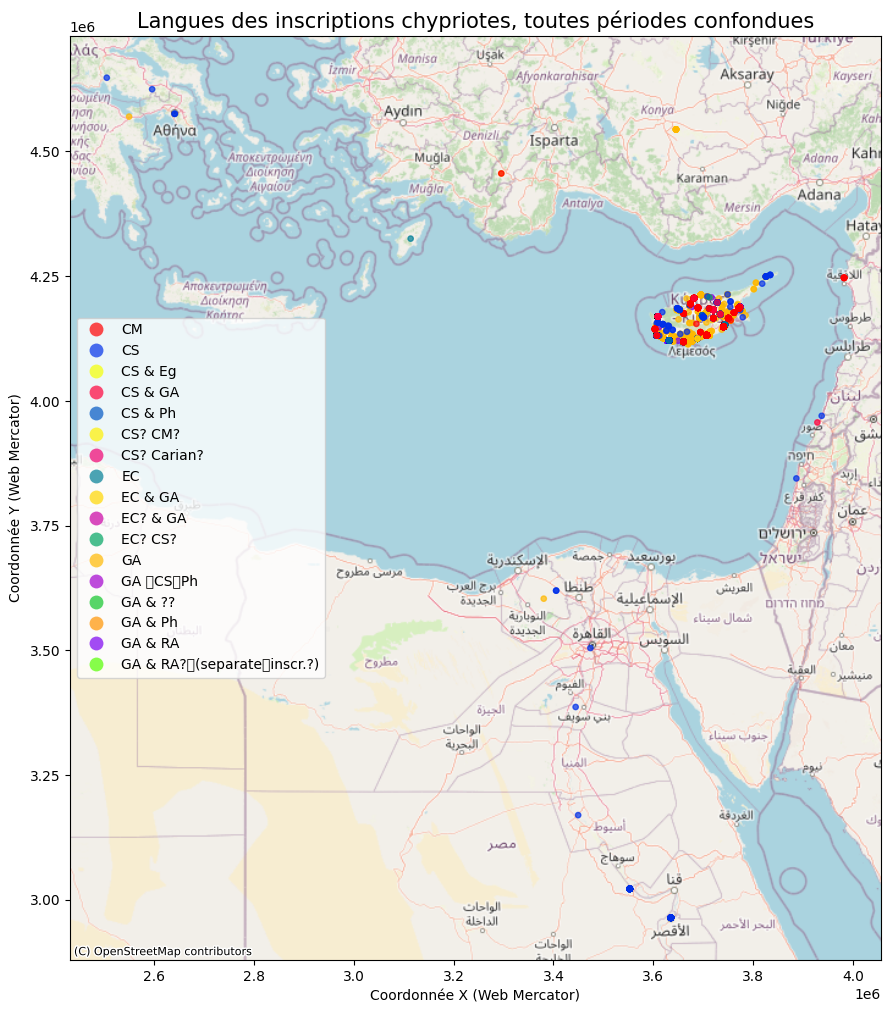

In [72]:
gdf_inscriptions_webmercator = gdf_inscriptions.to_crs(epsg=3857) #convertir de 4326 à 3857 pour faire fonctionner les données avec OSM
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_inscriptions_webmercator.plot(ax=ax, column='Type', legend=True, markersize=15, alpha=0.7, cmap='prism')
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik) #grâce à contextily, fond de carte osm
ax.set_title('Langues des inscriptions chypriotes, toutes périodes confondues', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')
plt.show()

) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
) missing from font(s) DejaVu Sans.
  draw()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


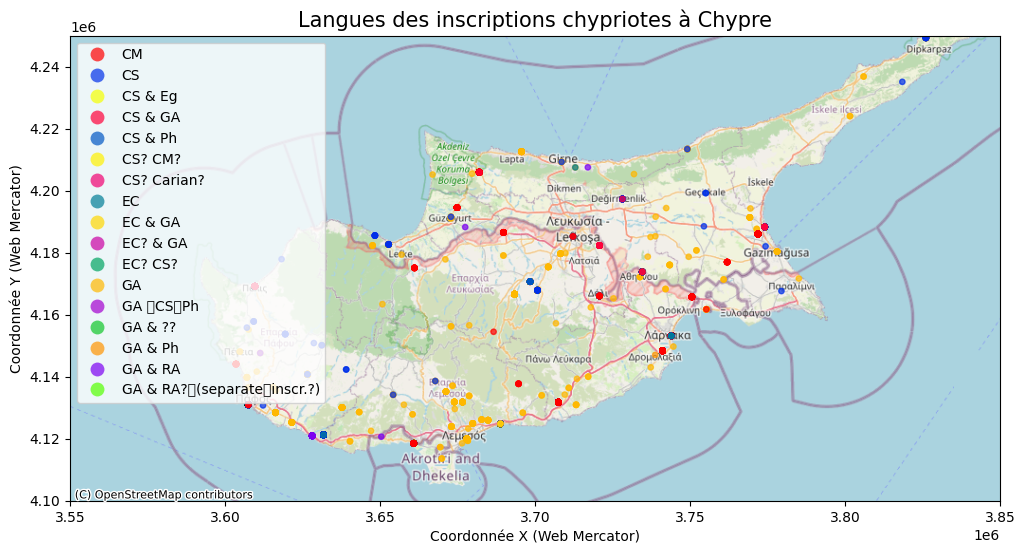

In [73]:
gdf_inscriptions_webmercator = gdf_inscriptions.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_inscriptions_webmercator.plot(ax=ax, column='Type', legend=True, markersize=15, alpha=0.7, cmap='prism')
ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Langues des inscriptions chypriotes à Chypre', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

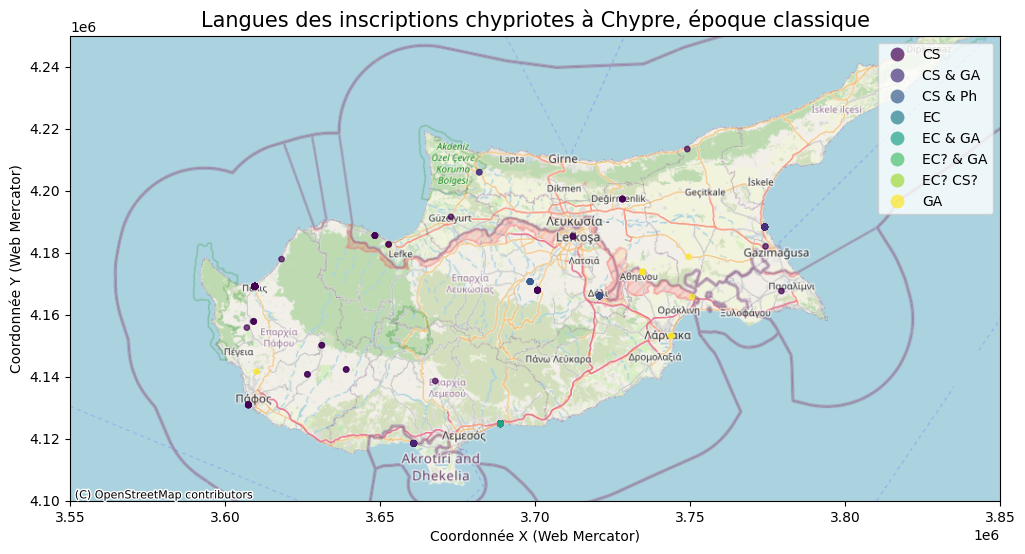

In [74]:
periode_cible = 'Classical'
gdf_filtre = gdf_inscriptions_webmercator[gdf_inscriptions_webmercator['Date'] == periode_cible]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_filtre.plot(ax=ax, column='Type', legend=True, markersize=15, alpha=0.7, cmap='viridis')
ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque classique', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

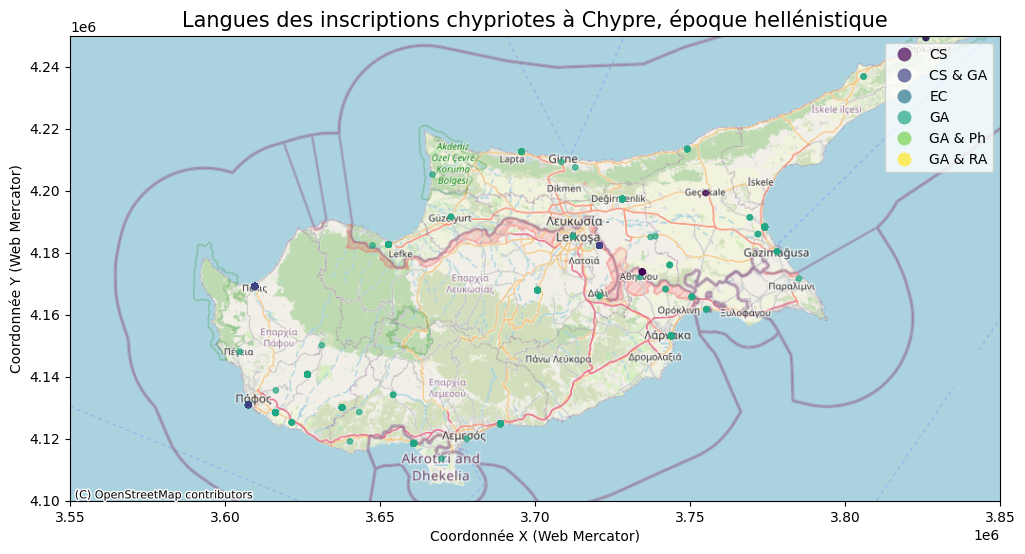

In [75]:
periode_cible = 'Hellenistic'
gdf_filtre = gdf_inscriptions_webmercator[gdf_inscriptions_webmercator['Date'] == periode_cible]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_filtre.plot(ax=ax, column='Type', legend=True, markersize=15, alpha=0.7, cmap='viridis')
ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque hellénistique', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
) missing from font(s) DejaVu Sans.
  draw()
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


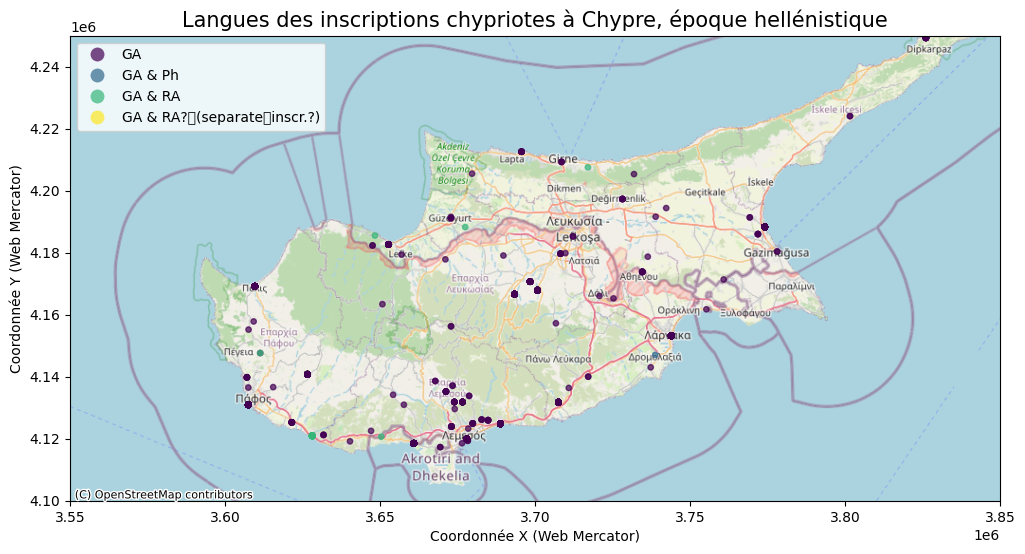

In [76]:
periode_cible = 'Roman'
gdf_filtre = gdf_inscriptions_webmercator[gdf_inscriptions_webmercator['Date'] == periode_cible]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_filtre.plot(ax=ax, column='Type', legend=True, markersize=15, alpha=0.7, cmap='viridis')
ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque hellénistique', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

-------------

Visualisation des inscriptions par langue et par époque

-----------

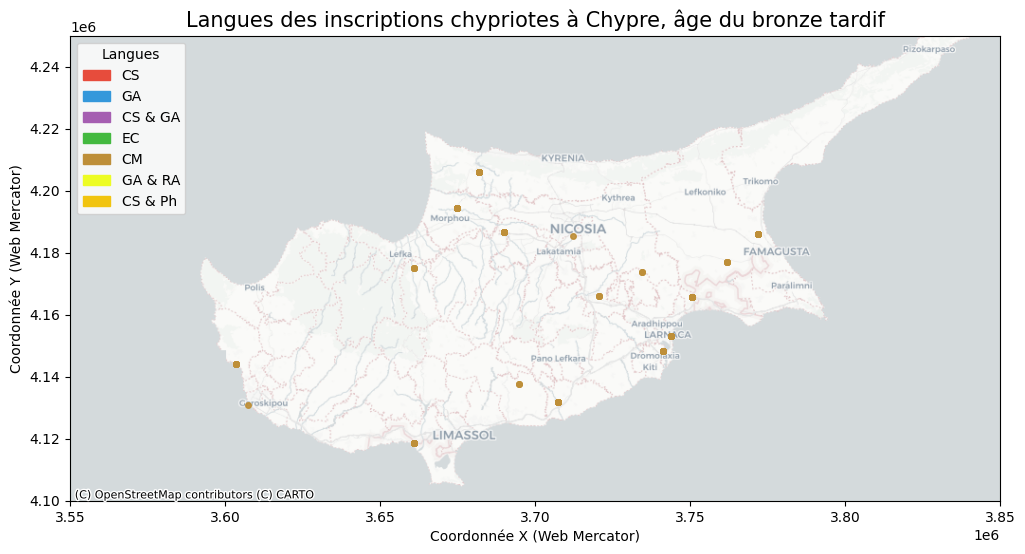

In [204]:
import matplotlib.patches as mpatches

periode_cible = 'LC'

gdf_filtre = gdf_inscriptions_webmercator[(gdf_inscriptions_webmercator['Date'] == periode_cible) & (gdf_inscriptions_webmercator['Type'].isin(['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']))]

couleurs_types = {
    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'
}

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for type_langue, couleur in couleurs_types.items():
    data_subset = gdf_filtre[gdf_filtre['Type'] == type_langue]
    if not data_subset.empty:
        data_subset.plot(ax=ax, color=couleur, markersize=15, alpha=0.7, label=type_langue)

patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
ax.legend(handles=patches, title="Langues", loc='upper left')

ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Langues des inscriptions chypriotes à Chypre, âge du bronze tardif', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

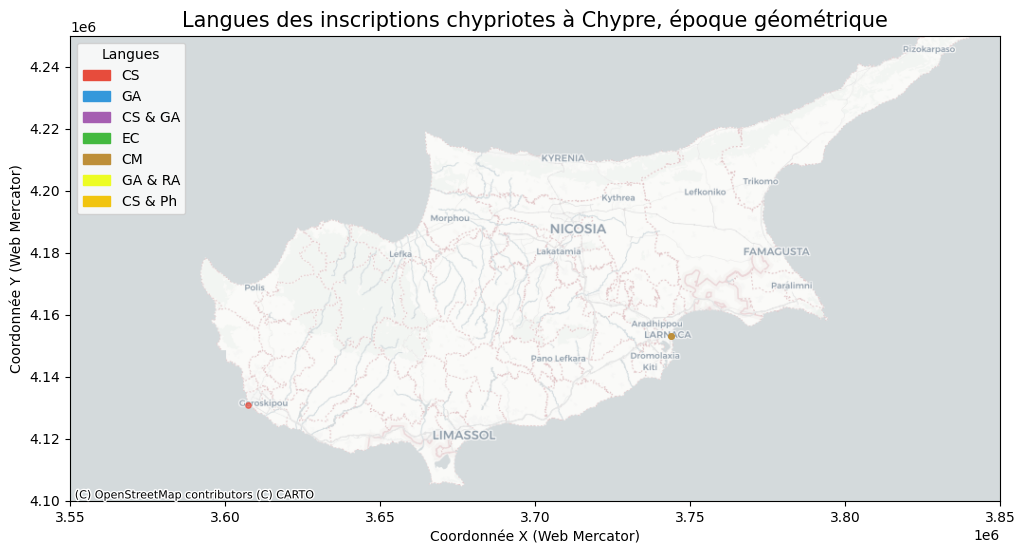

In [203]:
import matplotlib.patches as mpatches

periode_cible = 'Geometric'

gdf_filtre = gdf_inscriptions_webmercator[(gdf_inscriptions_webmercator['Date'] == periode_cible) & (gdf_inscriptions_webmercator['Type'].isin(['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']))]

couleurs_types = {
    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'
}

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for type_langue, couleur in couleurs_types.items():
    data_subset = gdf_filtre[gdf_filtre['Type'] == type_langue]
    if not data_subset.empty:
        data_subset.plot(ax=ax, color=couleur, markersize=15, alpha=0.7, label=type_langue)

patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
ax.legend(handles=patches, title="Langues", loc='upper left')

ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque géométrique', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

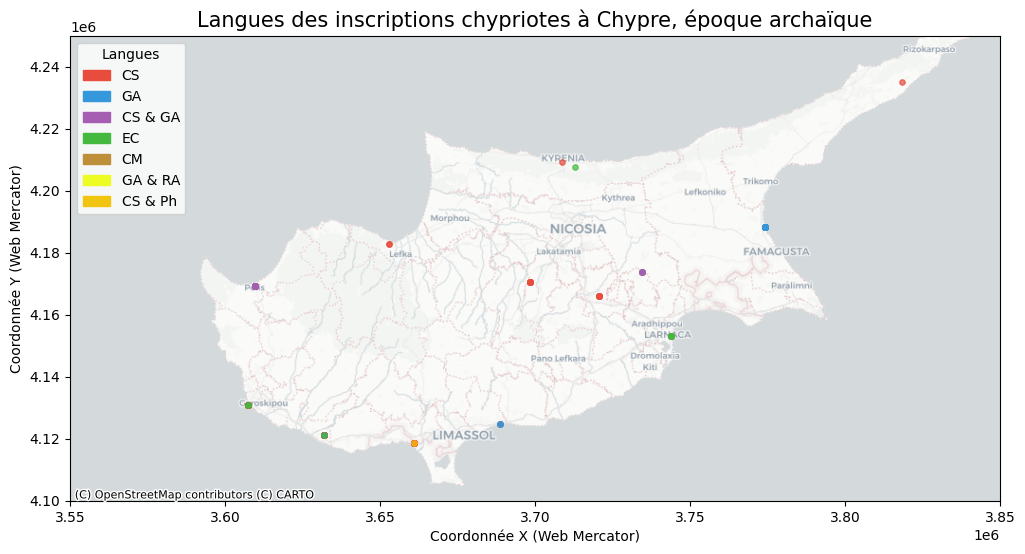

In [202]:
import matplotlib.patches as mpatches

periode_cible = 'Archaic'

gdf_filtre = gdf_inscriptions_webmercator[(gdf_inscriptions_webmercator['Date'] == periode_cible) & (gdf_inscriptions_webmercator['Type'].isin(['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']))]

couleurs_types = {
    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'
}

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for type_langue, couleur in couleurs_types.items():
    data_subset = gdf_filtre[gdf_filtre['Type'] == type_langue]
    if not data_subset.empty:
        data_subset.plot(ax=ax, color=couleur, markersize=15, alpha=0.7, label=type_langue)

patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
ax.legend(handles=patches, title="Langues", loc='upper left')

ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque archaïque', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

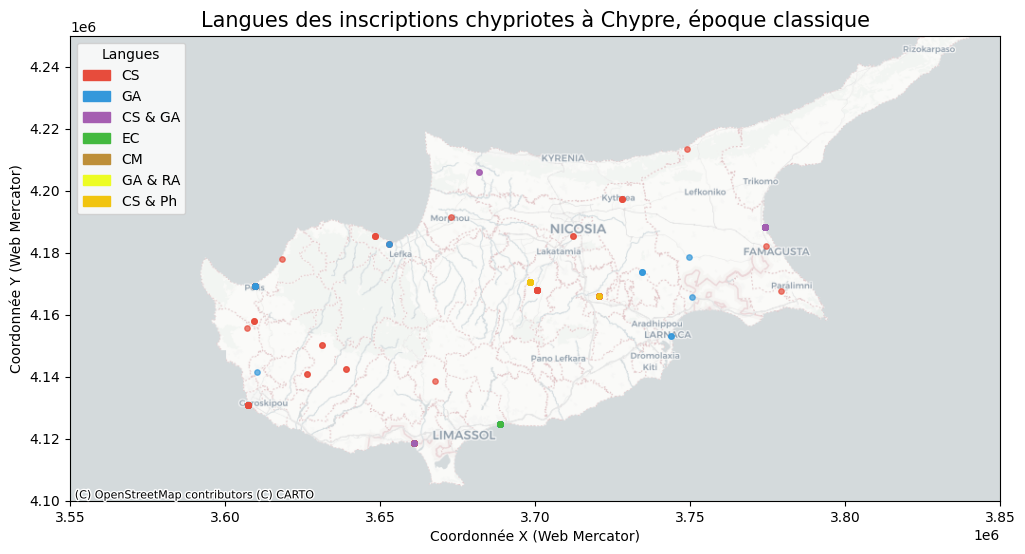

In [199]:
import matplotlib.patches as mpatches

periode_cible = 'Classical'

gdf_filtre = gdf_inscriptions_webmercator[(gdf_inscriptions_webmercator['Date'] == periode_cible) & (gdf_inscriptions_webmercator['Type'].isin(['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']))]

couleurs_types = {
    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'
}

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for type_langue, couleur in couleurs_types.items():
    data_subset = gdf_filtre[gdf_filtre['Type'] == type_langue]
    if not data_subset.empty:
        data_subset.plot(ax=ax, color=couleur, markersize=15, alpha=0.7, label=type_langue)

patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
ax.legend(handles=patches, title="Langues", loc='upper left')

ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque classique', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

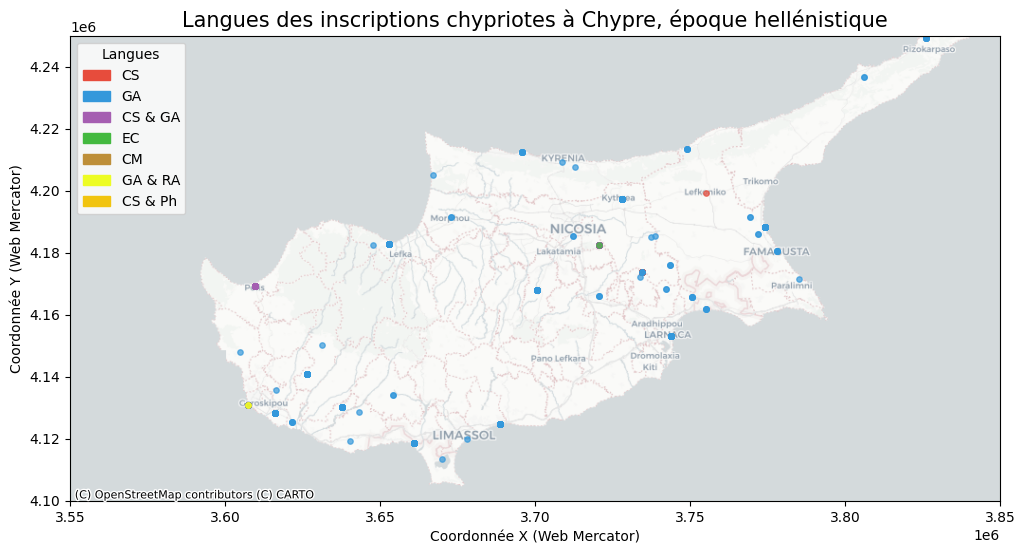

In [194]:
import matplotlib.patches as mpatches

periode_cible = 'Hellenistic'

gdf_filtre = gdf_inscriptions_webmercator[(gdf_inscriptions_webmercator['Date'] == periode_cible) & (gdf_inscriptions_webmercator['Type'].isin(['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']))]

couleurs_types = {
    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'
}

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for type_langue, couleur in couleurs_types.items():
    data_subset = gdf_filtre[gdf_filtre['Type'] == type_langue]
    if not data_subset.empty:
        data_subset.plot(ax=ax, color=couleur, markersize=15, alpha=0.7, label=type_langue)

patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
ax.legend(handles=patches, title="Langues", loc='upper left')

ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque hellénistique', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

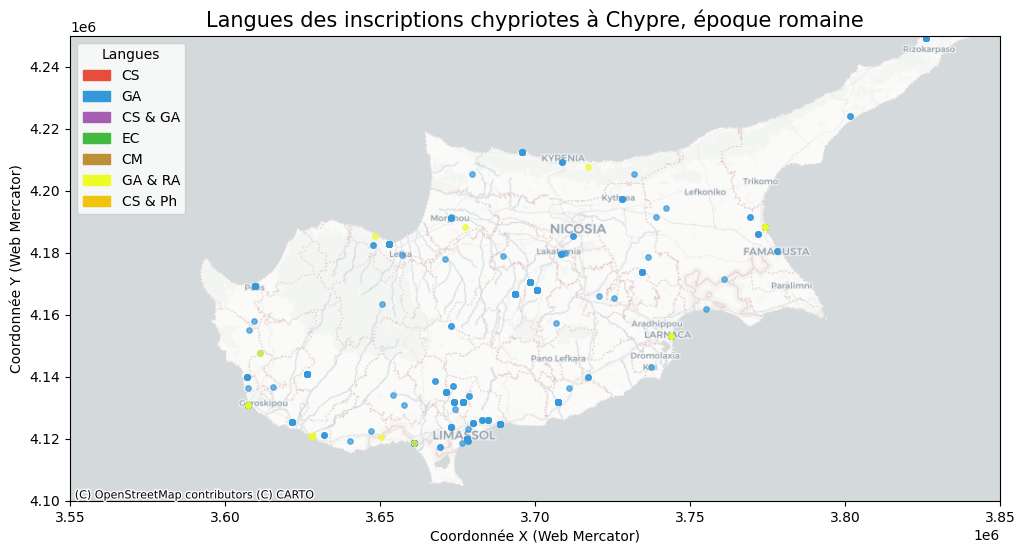

In [198]:
import matplotlib.patches as mpatches

periode_cible = 'Roman'

gdf_filtre = gdf_inscriptions_webmercator[(gdf_inscriptions_webmercator['Date'] == periode_cible) & (gdf_inscriptions_webmercator['Type'].isin(['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']))]

couleurs_types = {
    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'
}

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for type_langue, couleur in couleurs_types.items():
    data_subset = gdf_filtre[gdf_filtre['Type'] == type_langue]
    if not data_subset.empty:
        data_subset.plot(ax=ax, color=couleur, markersize=15, alpha=0.7, label=type_langue)

patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
ax.legend(handles=patches, title="Langues", loc='upper left')

ax.set_xlim(3550000, 3850000) # Longitude Ouest à Est
ax.set_ylim(4100000, 4250000) # Latitude Sud à Nord
cx.add_basemap(ax, crs=gdf_inscriptions_webmercator.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_title('Langues des inscriptions chypriotes à Chypre, époque romaine', fontsize=15)
ax.set_xlabel('Coordonnée X (Web Mercator)')
ax.set_ylabel('Coordonnée Y (Web Mercator)')

plt.show()

--------------

Visualisation des établissements par langue majoritaire et par époque

--------------

Préparation des données

In [97]:
gdf_settlement = pd.read_csv("gdf_settlement_ecriture.csv")
gdf_settlement

ID   SiteID                                            Toponym  \
0        CY3           Ayia Marinouda-Marathounta Argakin tou Ayiou A...   
1        CY3           Ayia Marinouda-Marathounta Argakin tou Ayiou A...   
2        CY3           Ayia Marinouda-Marathounta Argakin tou Ayiou A...   
3        CY3           Ayia Marinouda-Marathounta Argakin tou Ayiou A...   
4        CY3           Ayia Marinouda-Marathounta Argakin tou Ayiou A...   
...      ...      ...                                                ...   
4138  CY1646  Polis 8                                                      
4139  CY1647  Polis 9                                                      
4140  CY1647  Polis 9                                                      
4141  CY1647  Polis 9                                                      
4142  CY1647  Polis 9                                                      

            Type    Period  subOcc  StartDate  EndDate  duration    Longitude  \
0     settlement    LC_IIA       0      -1550    -1450       100  452402.0000   
1     settlement    LC_IIB       0      -1450    -1300       150  452402.0000   
2     settlement    LC_IIC       0      -1300    -1200       100  452402.0000   
3     settlement   LC_IIIA       0      -1200    -1100       100  452402.0000   
4     settlement   LC_IIIB       0      -1100    -1050        50  452402.0000   
...          ...       ...     ...        ...      ...       ...          ...   
4138  settlement  E_Rom_II       0         50      250       200  448546.2264   
4139  settlement     Hel_I       0       -312     -200       112  448153.3194   
4140  settlement    Hel_II       0       -200      -58       142  448153.3194   
4141  settlement   E_Rom_I       0        -58       50       108  448153.3194   
4142  settlement  E_Rom_II       0         50      250       200  448153.3194   

      ...  Long_Cord   Lat_Cord  Notes LocQual  \
0     ...  32.479854  34.768001              A   
1     ...  32.479854  34.768001              A   
2     ...  32.479854  34.768001              A   
3     ...  32.479854  34.768001              A   
4     ...  32.479854  34.768001              A   
...   ...        ...        ...    ...     ...   
4138  ...  32.435909  35.033094              D   
4139  ...  32.431618  35.030748              D   
4140  ...  32.431618  35.030748              D   
4141  ...  32.431618  35.030748              D   
4142  ...  32.431618  35.030748              D   

                                                Sources  \
0     Georgious 2006; Agapiou et al 2020; Sørensen &...   
1     Georgious 2006; Agapiou et al 2020; Sørensen &...   
2     Georgious 2006; Agapiou et al 2020; Sørensen &...   
3     Georgious 2006; Agapiou et al 2020; Sørensen &...   
4     Georgious 2006; Agapiou et al 2020; Sørensen &...   
...                                                 ...   
4138                                         Raber 1987   
4139                                         Raber 1987   
4140                                         Raber 1987   
4141                                         Raber 1987   
4142                                         Raber 1987   

                         surveyLink                         geometry  \
0     80-E-56; Sorensen & Rupp 1993  POINT (32.47985389 34.76800139)   
1     80-E-56; Sorensen & Rupp 1993  POINT (32.47985389 34.76800139)   
2     80-E-56; Sorensen & Rupp 1993  POINT (32.47985389 34.76800139)   
3     80-E-56; Sorensen & Rupp 1993  POINT (32.47985389 34.76800139)   
4     80-E-56; Sorensen & Rupp 1993  POINT (32.47985389 34.76800139)   
...                             ...                              ...   
4138                            ;    POINT (32.43590918 35.03309428)   
4139                            ;      POINT (32.431618 35.03074809)   
4140                            ;      POINT (32.431618 35.03074809)   
4141                            ;      POINT (32.431618 35.03074809)   
4142                  

In [98]:
gdf_settlement['geometry'] = gpd.points_from_xy(gdf_settlement['Long_Cord'], gdf_settlement['Lat_Cord'])
gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry='geometry', crs='EPSG:4326')

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

CHYPRE_X = (3580000, 3860000)
CHYPRE_Y = (4100000, 4260000)

def calc_size(n):
    # Formule fixe pour que 100 inscriptions fassent la même taille partout
    return 40 + (np.sqrt(n) * 20)

couleurs = {
    "LC": "#8e44ad", "Geometric": "#2980b9", "Archaic": "#27ae60",
    "Classical": "#f39c12", "Hellenistic": "#d35400", "Roman": "#c0392b"
}

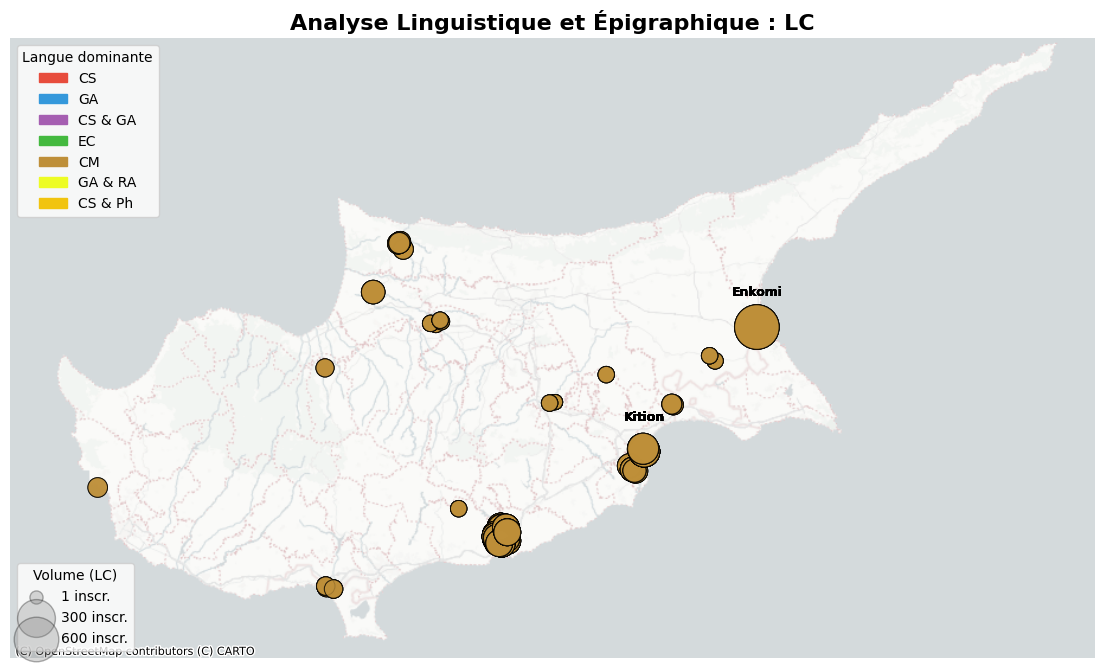

In [205]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import contextily as cx

periode_cible = 'LC'
seuil_nom = 100

types_cibles = ['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']

inscr_filtrees = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == periode_cible) &
    (gdf_inscriptions_webmercator['Type'].isin(types_cibles))
].copy()

stats_periode = inscr_filtrees.groupby('Settlement_ID').size().reset_index(name='Count_Period')

mode_langues = (inscr_filtrees.groupby(['Settlement_ID', 'Type'])
                .size()
                .reset_index(name='count_type')
                .sort_values(['Settlement_ID', 'count_type'], ascending=[True, False])
                .drop_duplicates('Settlement_ID'))
mode_langues = mode_langues.rename(columns={'Type': 'Langue_Dominante'})


gdf_sites_langue = gdf_settlement.to_crs(epsg=3857).merge(
    stats_periode, left_on='ID', right_on='Settlement_ID', how='inner'
).merge(
    mode_langues[['Settlement_ID', 'Langue_Dominante']], on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

couleurs_types = {    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'}

for lang, couleur in couleurs_types.items():
    subset = gdf_sites_langue[gdf_sites_langue['Langue_Dominante'] == lang]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Count_Period']) * 40)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=couleur, s=m_sizes, alpha=0.8, edgecolors='black',
            linewidth=0.7, zorder=3
        )

for idx, row in gdf_sites_langue.iterrows():
    if row['Count_Period'] >= seuil_nom and 'Larnaka' not in str(row['Toponym']):
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, centroid.y + 8000,
            row['Toponym'], fontsize=9, fontweight='bold', ha='center',
            bbox=dict(facecolor='none', alpha=0.6, edgecolor='none', pad=0.2),
            zorder=4
        )



patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
leg_langue = ax.legend(handles=patches, title="Langue dominante", loc='upper left', frameon=True)
ax.add_artist(leg_langue)

v_max = int(gdf_sites_langue['Count_Period'].max())
paliers = sorted(list(set([1, v_max // 2, v_max])))
handles_taille = [ax.scatter([], [], c='gray', alpha=0.3, s=50 + (np.sqrt(v) * 40), edgecolors='black') for v in paliers]
ax.legend(handles_taille, [f"{v} inscr." for v in paliers],
          title=f"Volume ({periode_cible})", loc='lower left', frameon=True)

ax.set_title(f'Analyse Linguistique et Épigraphique : {periode_cible}', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

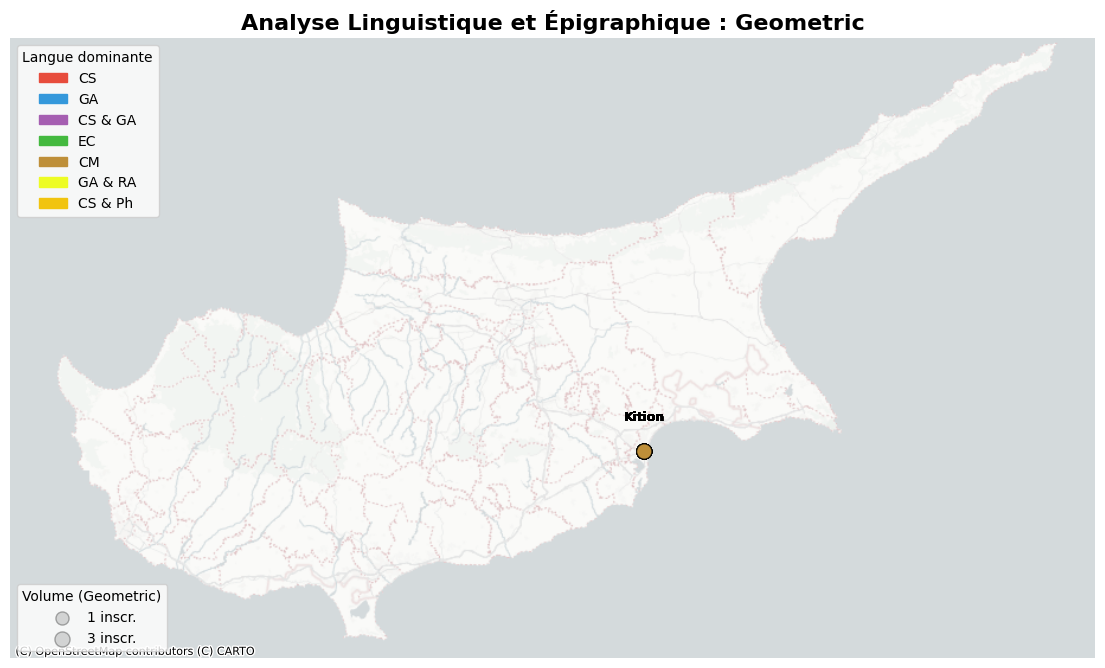

In [207]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import contextily as cx

periode_cible = 'Geometric'
seuil_nom = 1

types_cibles = ['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']

inscr_filtrees = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == periode_cible) &
    (gdf_inscriptions_webmercator['Type'].isin(types_cibles))
].copy()

stats_periode = inscr_filtrees.groupby('Settlement_ID').size().reset_index(name='Count_Period')

mode_langues = (inscr_filtrees.groupby(['Settlement_ID', 'Type'])
                .size()
                .reset_index(name='count_type')
                .sort_values(['Settlement_ID', 'count_type'], ascending=[True, False])
                .drop_duplicates('Settlement_ID'))
mode_langues = mode_langues.rename(columns={'Type': 'Langue_Dominante'})

gdf_sites_langue = gdf_settlement.to_crs(epsg=3857).merge(
    stats_periode, left_on='ID', right_on='Settlement_ID', how='inner'
).merge(
    mode_langues[['Settlement_ID', 'Langue_Dominante']], on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

couleurs_types = {    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'}

for lang, couleur in couleurs_types.items():
    subset = gdf_sites_langue[gdf_sites_langue['Langue_Dominante'] == lang]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Count_Period']) * 40)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=couleur, s=m_sizes, alpha=0.8, edgecolors='black',
            linewidth=0.7, zorder=3
        )

for idx, row in gdf_sites_langue.iterrows():
    if row['Count_Period'] >= seuil_nom and 'Larnaka' not in str(row['Toponym']):
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, centroid.y + 8000,
            row['Toponym'], fontsize=9, fontweight='bold', ha='center',
            bbox=dict(facecolor='none', alpha=0.6, edgecolor='none', pad=0.2),
            zorder=4
        )



patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
leg_langue = ax.legend(handles=patches, title="Langue dominante", loc='upper left', frameon=True)
ax.add_artist(leg_langue)

v_max = int(gdf_sites_langue['Count_Period'].max())
paliers = sorted(list(set([1, v_max // 2, v_max])))
handles_taille = [ax.scatter([], [], c='gray', alpha=0.3, s=50 + (np.sqrt(v) * 40), edgecolors='black') for v in paliers]
ax.legend(handles_taille, [f"{v} inscr." for v in paliers],
          title=f"Volume ({periode_cible})", loc='lower left', frameon=True)

ax.set_title(f'Analyse Linguistique et Épigraphique : {periode_cible}', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

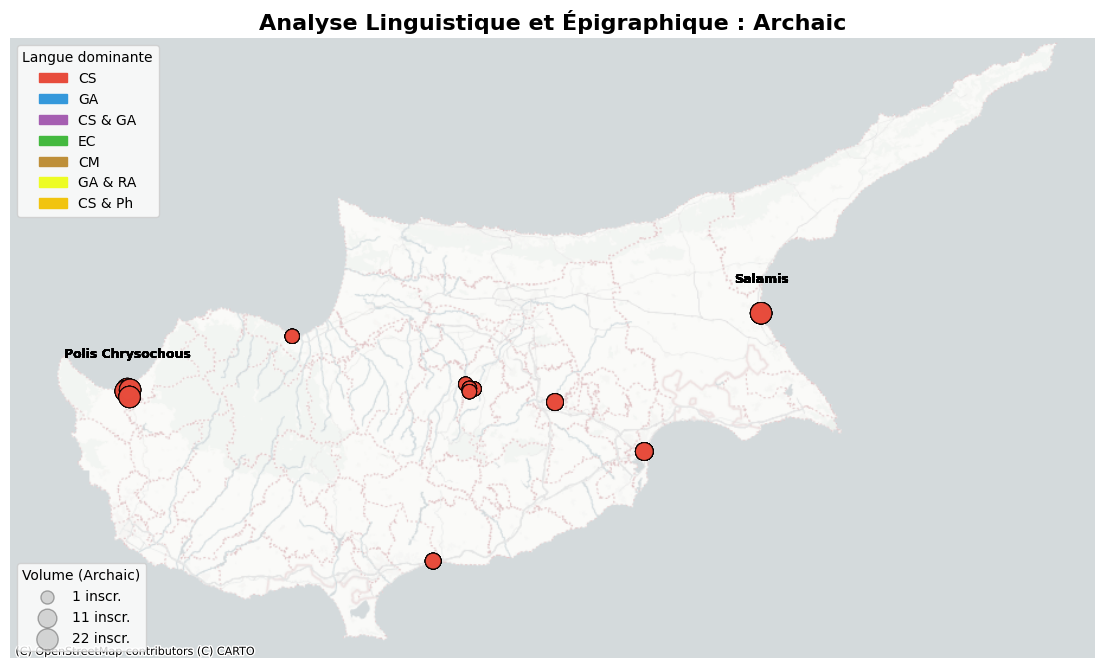

In [208]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import contextily as cx

periode_cible = 'Archaic'
seuil_nom = 10

types_cibles = ['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']

inscr_filtrees = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == periode_cible) &
    (gdf_inscriptions_webmercator['Type'].isin(types_cibles))
].copy()

stats_periode = inscr_filtrees.groupby('Settlement_ID').size().reset_index(name='Count_Period')

mode_langues = (inscr_filtrees.groupby(['Settlement_ID', 'Type'])
                .size()
                .reset_index(name='count_type')
                .sort_values(['Settlement_ID', 'count_type'], ascending=[True, False])
                .drop_duplicates('Settlement_ID'))
mode_langues = mode_langues.rename(columns={'Type': 'Langue_Dominante'})


gdf_sites_langue = gdf_settlement.to_crs(epsg=3857).merge(
    stats_periode, left_on='ID', right_on='Settlement_ID', how='inner'
).merge(
    mode_langues[['Settlement_ID', 'Langue_Dominante']], on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

couleurs_types = {    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'}

for lang, couleur in couleurs_types.items():
    subset = gdf_sites_langue[gdf_sites_langue['Langue_Dominante'] == lang]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Count_Period']) * 40)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=couleur, s=m_sizes, alpha=0.8, edgecolors='black',
            linewidth=0.7, zorder=3
        )

for idx, row in gdf_sites_langue.iterrows():
    if row['Count_Period'] >= seuil_nom and 'Larnaka' not in str(row['Toponym']):
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, centroid.y + 8000,
            row['Toponym'], fontsize=9, fontweight='bold', ha='center',
            bbox=dict(facecolor='none', alpha=0.6, edgecolor='none', pad=0.2),
            zorder=4
        )



patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
leg_langue = ax.legend(handles=patches, title="Langue dominante", loc='upper left', frameon=True)
ax.add_artist(leg_langue)

v_max = int(gdf_sites_langue['Count_Period'].max())
paliers = sorted(list(set([1, v_max // 2, v_max])))
handles_taille = [ax.scatter([], [], c='gray', alpha=0.3, s=50 + (np.sqrt(v) * 40), edgecolors='black') for v in paliers]
ax.legend(handles_taille, [f"{v} inscr." for v in paliers],
          title=f"Volume ({periode_cible})", loc='lower left', frameon=True)

ax.set_title(f'Analyse Linguistique et Épigraphique : {periode_cible}', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

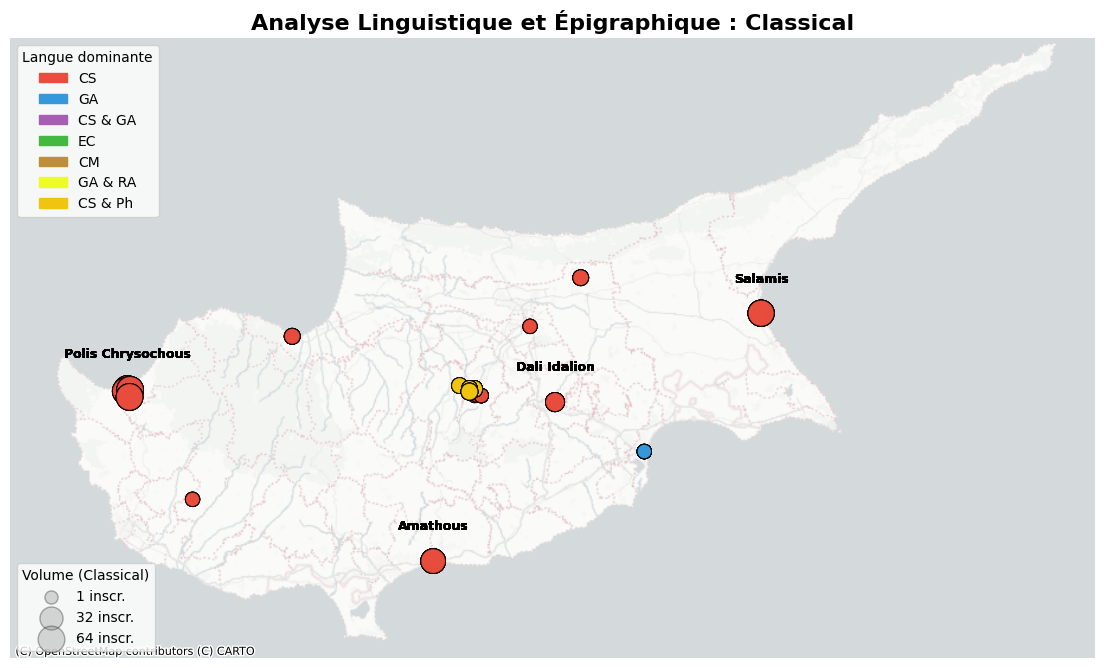

In [209]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import contextily as cx

periode_cible = 'Classical'
seuil_nom = 10

types_cibles = ['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']

inscr_filtrees = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == periode_cible) &
    (gdf_inscriptions_webmercator['Type'].isin(types_cibles))
].copy()

stats_periode = inscr_filtrees.groupby('Settlement_ID').size().reset_index(name='Count_Period')

mode_langues = (inscr_filtrees.groupby(['Settlement_ID', 'Type'])
                .size()
                .reset_index(name='count_type')
                .sort_values(['Settlement_ID', 'count_type'], ascending=[True, False])
                .drop_duplicates('Settlement_ID'))
mode_langues = mode_langues.rename(columns={'Type': 'Langue_Dominante'})


gdf_sites_langue = gdf_settlement.to_crs(epsg=3857).merge(
    stats_periode, left_on='ID', right_on='Settlement_ID', how='inner'
).merge(
    mode_langues[['Settlement_ID', 'Langue_Dominante']], on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

couleurs_types = {    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'}

for lang, couleur in couleurs_types.items():
    subset = gdf_sites_langue[gdf_sites_langue['Langue_Dominante'] == lang]
    if not subset.empty:
        # On utilise 'Count_Period' pour la taille (cohérence avec la période)
        m_sizes = 50 + (np.sqrt(subset['Count_Period']) * 40)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=couleur, s=m_sizes, alpha=0.8, edgecolors='black',
            linewidth=0.7, zorder=3
        )

for idx, row in gdf_sites_langue.iterrows():
    if row['Count_Period'] >= seuil_nom and 'Larnaka' not in str(row['Toponym']):
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, centroid.y + 8000,
            row['Toponym'], fontsize=9, fontweight='bold', ha='center',
            bbox=dict(facecolor='none', alpha=0.6, edgecolor='none', pad=0.2),
            zorder=4
        )



patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
leg_langue = ax.legend(handles=patches, title="Langue dominante", loc='upper left', frameon=True)
ax.add_artist(leg_langue)

v_max = int(gdf_sites_langue['Count_Period'].max())
paliers = sorted(list(set([1, v_max // 2, v_max])))
handles_taille = [ax.scatter([], [], c='gray', alpha=0.3, s=50 + (np.sqrt(v) * 40), edgecolors='black') for v in paliers]
ax.legend(handles_taille, [f"{v} inscr." for v in paliers],
          title=f"Volume ({periode_cible})", loc='lower left', frameon=True)

ax.set_title(f'Analyse Linguistique et Épigraphique : {periode_cible}', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

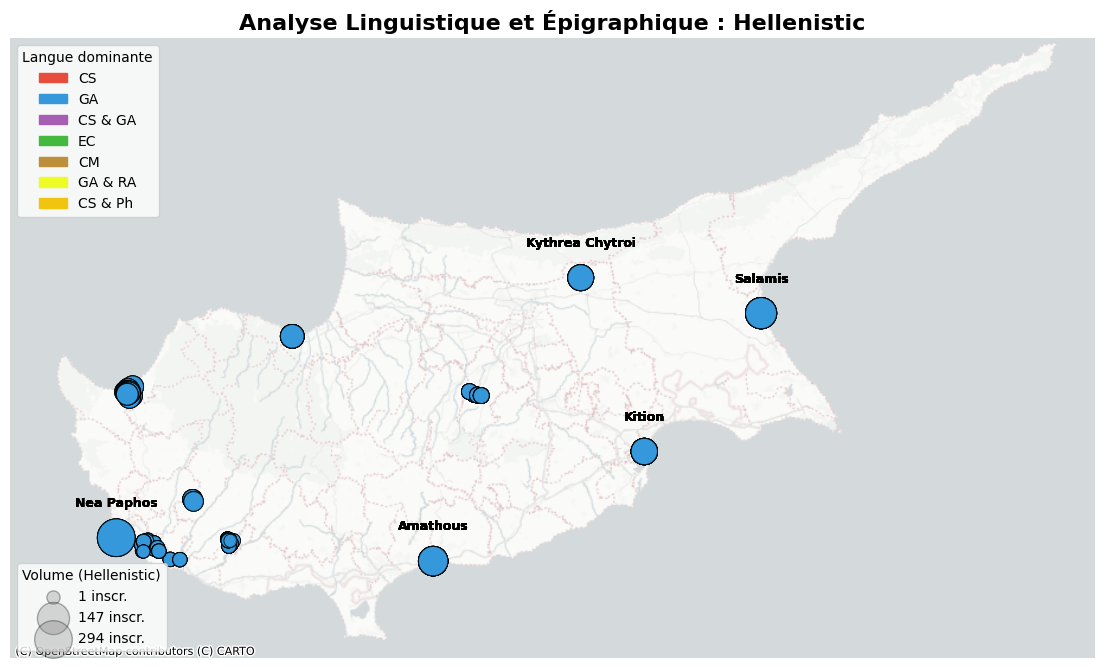

In [211]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import contextily as cx

periode_cible = 'Hellenistic'
seuil_nom = 50

types_cibles = ['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']

inscr_filtrees = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == periode_cible) &
    (gdf_inscriptions_webmercator['Type'].isin(types_cibles))
].copy()

stats_periode = inscr_filtrees.groupby('Settlement_ID').size().reset_index(name='Count_Period')

mode_langues = (inscr_filtrees.groupby(['Settlement_ID', 'Type'])
                .size()
                .reset_index(name='count_type')
                .sort_values(['Settlement_ID', 'count_type'], ascending=[True, False])
                .drop_duplicates('Settlement_ID'))
mode_langues = mode_langues.rename(columns={'Type': 'Langue_Dominante'})


gdf_sites_langue = gdf_settlement.to_crs(epsg=3857).merge(
    stats_periode, left_on='ID', right_on='Settlement_ID', how='inner'
).merge(
    mode_langues[['Settlement_ID', 'Langue_Dominante']], on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

couleurs_types = {    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'}

for lang, couleur in couleurs_types.items():
    subset = gdf_sites_langue[gdf_sites_langue['Langue_Dominante'] == lang]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Count_Period']) * 40)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=couleur, s=m_sizes, alpha=0.8, edgecolors='black',
            linewidth=0.7, zorder=3
        )

for idx, row in gdf_sites_langue.iterrows():
    if row['Count_Period'] >= seuil_nom and 'Larnaka' not in str(row['Toponym']):
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, centroid.y + 8000,
            row['Toponym'], fontsize=9, fontweight='bold', ha='center',
            bbox=dict(facecolor='none', alpha=0.6, edgecolor='none', pad=0.2),
            zorder=4
        )



patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
leg_langue = ax.legend(handles=patches, title="Langue dominante", loc='upper left', frameon=True)
ax.add_artist(leg_langue)

v_max = int(gdf_sites_langue['Count_Period'].max())
paliers = sorted(list(set([1, v_max // 2, v_max])))
handles_taille = [ax.scatter([], [], c='gray', alpha=0.3, s=50 + (np.sqrt(v) * 40), edgecolors='black') for v in paliers]
ax.legend(handles_taille, [f"{v} inscr." for v in paliers],
          title=f"Volume ({periode_cible})", loc='lower left', frameon=True)

ax.set_title(f'Analyse Linguistique et Épigraphique : {periode_cible}', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

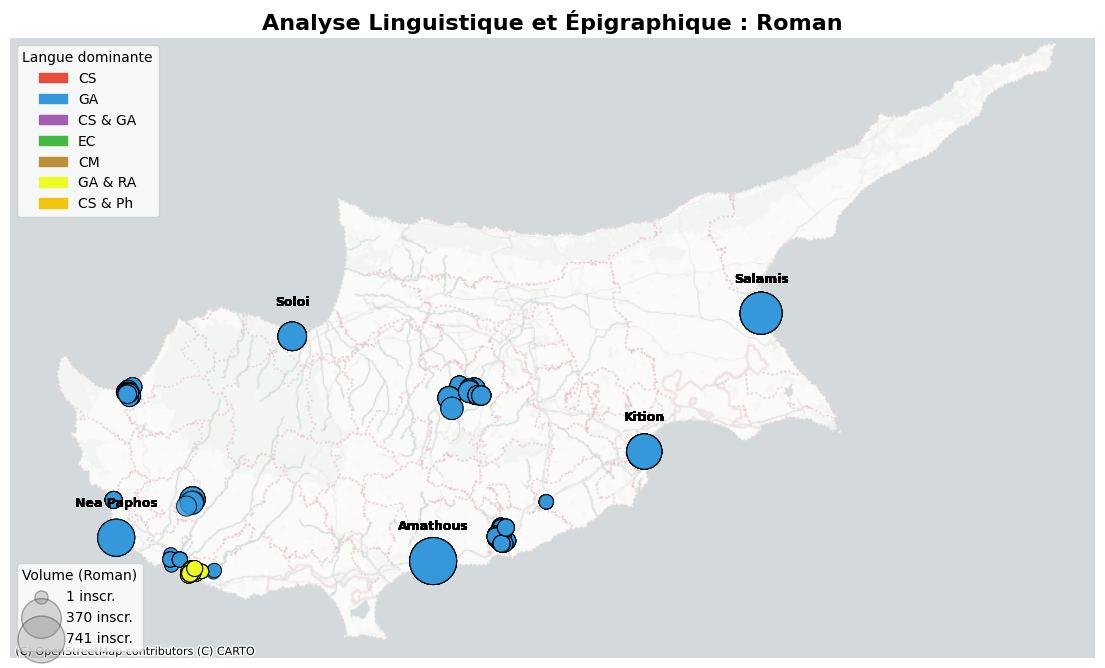

In [212]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import contextily as cx

periode_cible = 'Roman'
seuil_nom = 50

types_cibles = ['CS', 'GA', 'CS & GA', 'EC', 'CM', 'GA & RA', 'CS & Ph']

inscr_filtrees = gdf_inscriptions_webmercator[
    (gdf_inscriptions_webmercator['Date'] == periode_cible) &
    (gdf_inscriptions_webmercator['Type'].isin(types_cibles))
].copy()

stats_periode = inscr_filtrees.groupby('Settlement_ID').size().reset_index(name='Count_Period')

mode_langues = (inscr_filtrees.groupby(['Settlement_ID', 'Type'])
                .size()
                .reset_index(name='count_type')
                .sort_values(['Settlement_ID', 'count_type'], ascending=[True, False])
                .drop_duplicates('Settlement_ID'))
mode_langues = mode_langues.rename(columns={'Type': 'Langue_Dominante'})


gdf_sites_langue = gdf_settlement.to_crs(epsg=3857).merge(
    stats_periode, left_on='ID', right_on='Settlement_ID', how='inner'
).merge(
    mode_langues[['Settlement_ID', 'Langue_Dominante']], on='Settlement_ID', how='inner'
)

fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

couleurs_types = {    'CS': '#e74c3c',        # Rouge
    'GA': '#3498db',   # Bleu
    'CS & GA': '#a55eb1',
    'EC': '#43b93f',
    'CM': '#be8f39',
    'GA & RA': '#edfc24',
    'CS & Ph': '#f1c40f'}

for lang, couleur in couleurs_types.items():
    subset = gdf_sites_langue[gdf_sites_langue['Langue_Dominante'] == lang]
    if not subset.empty:
        m_sizes = 50 + (np.sqrt(subset['Count_Period']) * 40)

        ax.scatter(
            subset.geometry.centroid.x, subset.geometry.centroid.y,
            color=couleur, s=m_sizes, alpha=0.8, edgecolors='black',
            linewidth=0.7, zorder=3
        )

for idx, row in gdf_sites_langue.iterrows():
    if row['Count_Period'] >= seuil_nom and 'Larnaka' not in str(row['Toponym']):
        centroid = row.geometry.centroid
        ax.text(
            centroid.x, centroid.y + 8000,
            row['Toponym'], fontsize=9, fontweight='bold', ha='center',
            bbox=dict(facecolor='none', alpha=0.6, edgecolor='none', pad=0.2),
            zorder=4
        )



patches = [mpatches.Patch(color=c, label=l) for l, c in couleurs_types.items()]
leg_langue = ax.legend(handles=patches, title="Langue dominante", loc='upper left', frameon=True)
ax.add_artist(leg_langue)

v_max = int(gdf_sites_langue['Count_Period'].max())
paliers = sorted(list(set([1, v_max // 2, v_max])))
handles_taille = [ax.scatter([], [], c='gray', alpha=0.3, s=50 + (np.sqrt(v) * 40), edgecolors='black') for v in paliers]
ax.legend(handles_taille, [f"{v} inscr." for v in paliers],
          title=f"Volume ({periode_cible})", loc='lower left', frameon=True)

ax.set_title(f'Analyse Linguistique et Épigraphique : {periode_cible}', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()